In [ ]:
!pip install -U tensorflow_datasets

Requirement already up-to-date: tensorflow_datasets in /usr/local/lib/python3.7/dist-packages (4.3.0)


In [ ]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
import tensorflow_datasets as tfds
#tf.logging.set_verbosity(tf.logging.ERROR)


import numpy as np
import math
import matplotlib.pyplot as plt

import tqdm 
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

print(tf.__version__)

2.5.0


In [ ]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [ ]:
metadata

tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_path='/root/tensorflow_datasets/fashion_mnist/3.0.1',
    download_size=29.45 MiB,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao and
    

In [ ]:
class_names = ['Top/Tshirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [ ]:
train_dataset

<PrefetchDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>

In [ ]:
def normalize(images,labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)
test_image = test_dataset

In [ ]:
train_dataset

<MapDataset shapes: ((28, 28, 1), ()), types: (tf.float32, tf.int64)>

In [ ]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples

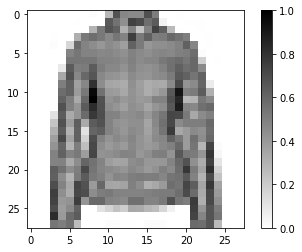

In [ ]:
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

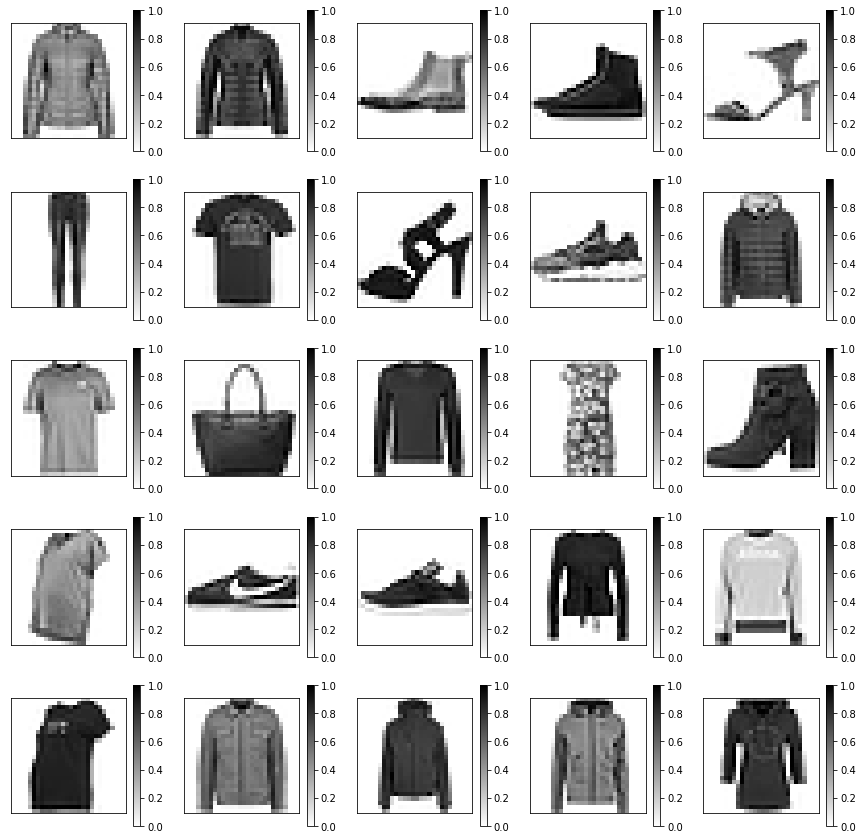

In [ ]:
plt.figure(figsize=(15,15))
i=0
for image, label in test_dataset.take(25):
  image = image.numpy().reshape((28,28))
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap=plt.cm.binary)
  plt.colorbar()
  plt.grid(False)
  i += 1
plt.show()

In [ ]:
#Build Model

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28,1)),
                             tf.keras.layers.Dense(128, activation=tf.nn.relu),
                             tf.keras.layers.Dense(64, activation=tf.nn.relu),
                             tf.keras.layers.Dense(10, activation=tf.nn.softmax) #Softmax Create Probablity Dist
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', #For Classification
              metrics=['accuracy'])

In [ ]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [ ]:
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 11s 3ms/step - loss: 0.4879 - accuracy: 0.8271
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3664 - accuracy: 0.8673
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3291 - accuracy: 0.8783
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3061 - accuracy: 0.8851
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2918 - accuracy: 0.8910


In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples))
print('Accuracy on Test Data:' , test_accuracy)

  301/10000 [..............................] - ETA: 37s - loss: 0.3483 - accuracy: 0.8804WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 10000 batches). You may need to use the repeat() function when building your dataset.


10000/10000 [==============================] - 1s 120us/step - loss: 0.3501 - accuracy: 0.8791
Accuracy on Test Data: 0.8791000247001648


In [ ]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [ ]:
predictions.shape

(32, 10)

In [ ]:
predictions[0]

array([6.0179955e-05, 5.8338759e-07, 2.8892925e-02, 2.1094997e-05,
       9.6213913e-01, 1.7199261e-07, 8.8271974e-03, 7.2330222e-09,
       5.8160775e-05, 5.1873860e-07], dtype=float32)

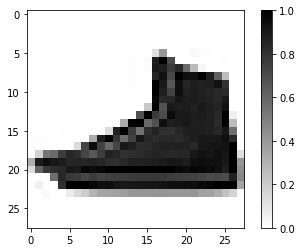

Predicted: Ankle Boot
Actual   : Sneaker


In [ ]:
x = 3

for image, label in test_image.take(x+1):
  pass

image = image.numpy().reshape((28,28))

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

print("Predicted: " + class_names[np.argmax(predictions[x])])
print("Actual   : " + class_names[test_labels[x]])